In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adp-kr-p3/problem2.csv
/kaggle/input/adp-kr-p3/problem3.csv
/kaggle/input/adp-kr-p3/problem1.csv


# 1번 
데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv     
데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기 

### 1-1 EDA 및 데이터 전처리
시각화 및 통계량 제시

In [3]:
df = pd.read_csv('/kaggle/input/adp-kr-p3/problem1.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


모든 변수가 수치형 변수로 이루어져 있으며, 종속변수인 Price 변수 또한 수치형 변수이므로 회귀분석을 해야함

In [5]:
df.describe()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


In [6]:
df.isna().sum()

Id                0
LotArea           0
LotFrontage     259
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
YearRemodAdd      0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
GarageCars        0
GarageArea        0
price             0
dtype: int64

LotArea 변수에만 259개의 결측치가 존재함

In [7]:
df.isna().sum() / len(df)

Id              0.000000
LotArea         0.000000
LotFrontage     0.177397
YearBuilt       0.000000
1stFlrSF        0.000000
2ndFlrSF        0.000000
YearRemodAdd    0.000000
TotRmsAbvGrd    0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
GarageCars      0.000000
GarageArea      0.000000
price           0.000000
dtype: float64

결측치의 비율이 약 17.7%로 20%를 넘지 않으므로 평균값이나 중앙값으로 대치할 필요가 있어보임

In [8]:
# 중앙값으로 대치
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df.isna().sum()

Id              0
LotArea         0
LotFrontage     0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
YearRemodAdd    0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
GarageCars      0
GarageArea      0
price           0
dtype: int64

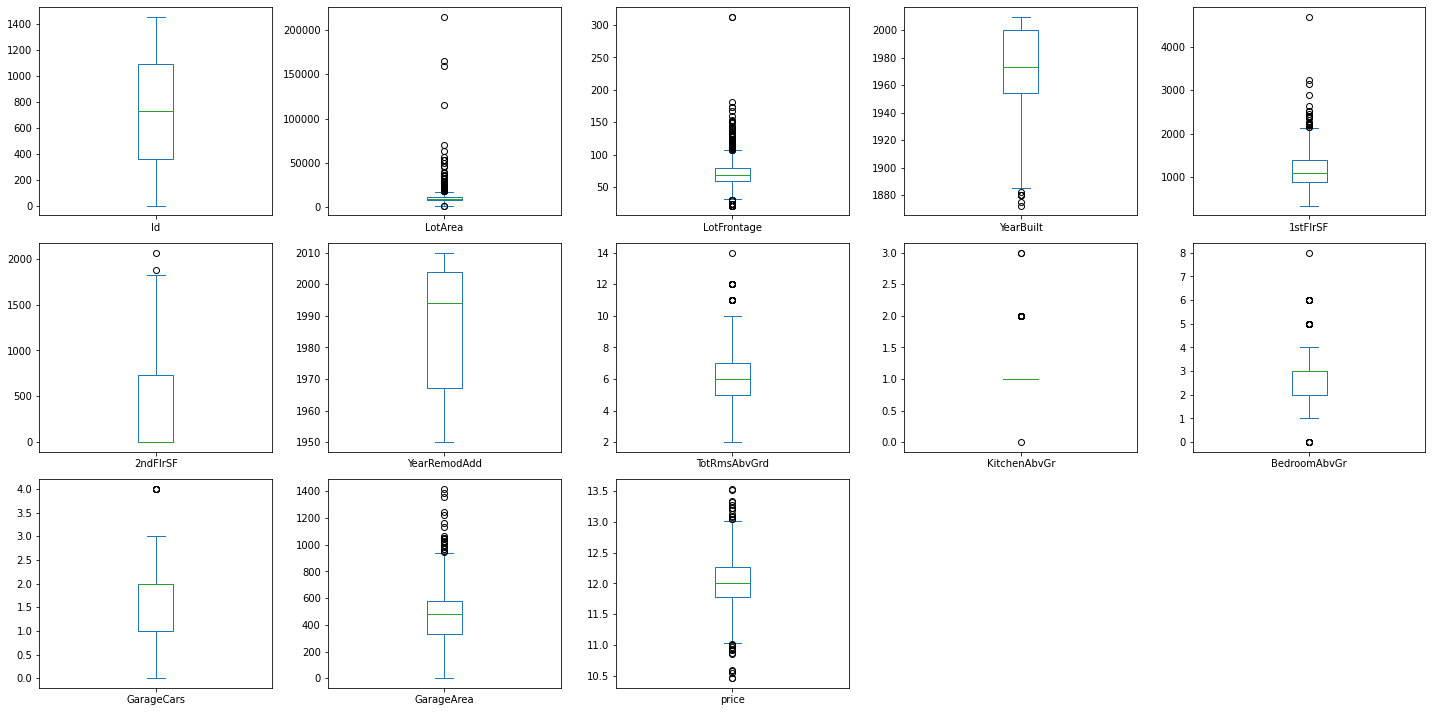

In [9]:
import matplotlib.pyplot as plt

df.plot(kind='box', subplots=True, layout=(3,5), figsize=(20,10))
plt.tight_layout()
plt.show()

### 1-2  Train,Valid,Test set으로 분할 및 시각화 제시

In [10]:
from sklearn.model_selection import train_test_split

df = df.rename(columns = {'1stFlrSF':'first', '2ndFlrSF':'second'})

X = df.drop(columns=['price', 'Id'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 0)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(1022, 11) (306, 11) (132, 11)
(1022,) (306,) (132,)


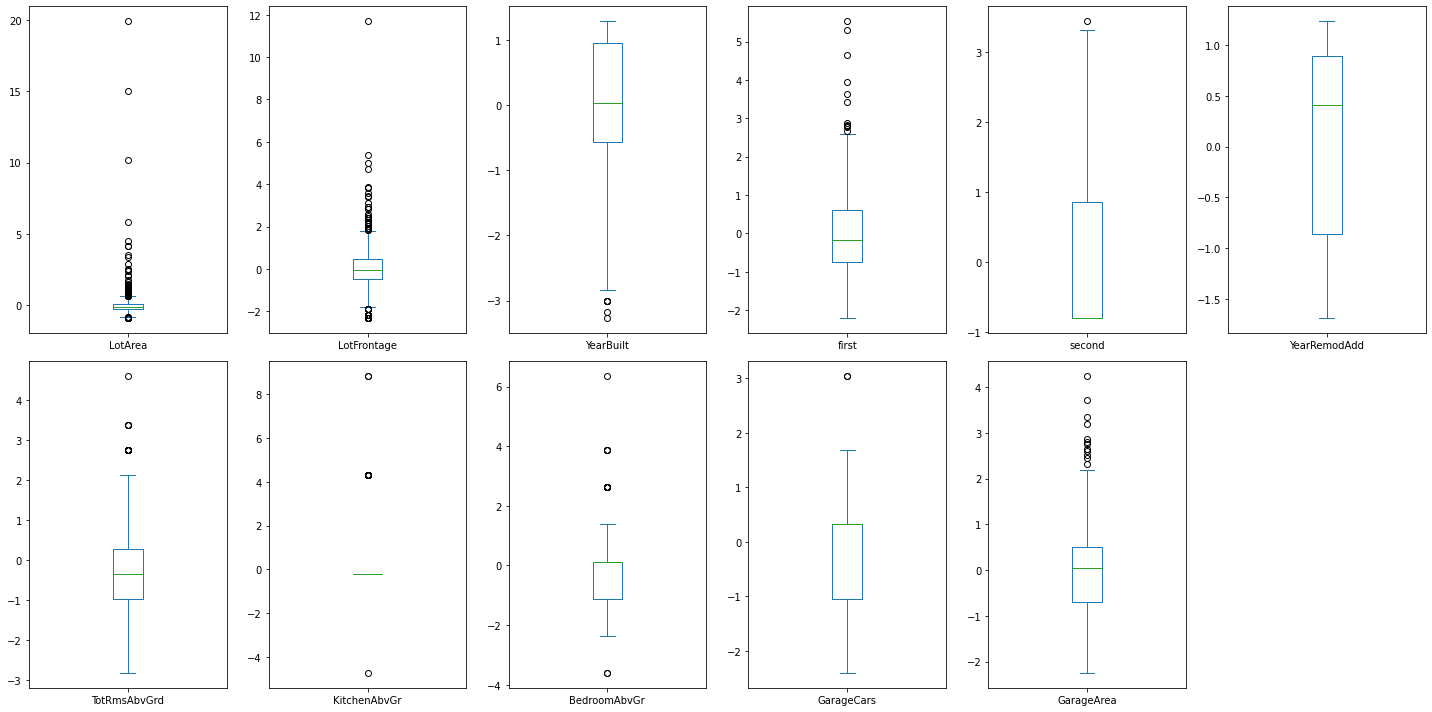

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test_sc = sc.transform(X_test)
X_val_sc = sc.transform(X_val)

X_train_sc.plot(kind='box', subplots=True, layout=(2,len(X_train_sc.columns)//2+1), figsize=(20,10))
plt.tight_layout()
plt.show()

### 1-3  2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [12]:
from itertools import permutations

comb = list(permutations(X_train.columns,3))   # X_train의 모든 컬럼을 3개씩 조합(중복X)
variables = '+'.join(list(X_train.columns)) + '+' + '+'.join([':'.join(list(y)) for y in comb])

In [13]:
from statsmodels.formula.api import ols

res = ols(f'price ~ {variables}', data = pd.concat([X_train, y_train], axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     37.41
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          1.03e-303
Time:                        15:42:28   Log-Likelihood:                 585.87
No. Observations:                1022   AIC:                            -821.7
Df Residuals:                     847   BIC:                             40.93
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -10.9552     11.693     -0.937      0.349     -33.906      11.995
LotArea                                -3.986e-05      0.000     -0.375      0.708      -0.000       0.000
LotFrontage                                0.0113      0.025      0.446      0.656      -0.038       0.061
YearBuilt                                  0.0050      0.003      1.746      0.081      -0.001       0.011
first                                  -4.945e-05      0.002     -0.026      0.979      -0.004       0.004
second                                    -0.0002      0.002     -0.115      0.908      -0.003       0.003
YearRemodAdd                               0.0052      0.004      1.151      0.250      -0.004       0.014
TotRmsAbvGrd                               0.2835      0.464      0.610      0.542      -0.628       1.195
KitchenAbvGr                               2.9283      5.446      0.538      0.591      -7.760      13.617
BedroomAbvGr                               1.4340      0.680      2.110      0.035       0.100       2.768
GarageCars                                 1.1353      1.117      1.016      0.310      -1.057       3.328
GarageArea                                -0.0067      0.004     -1.609      0.108      -0.015       0.001
LotArea:LotFrontage:YearBuilt          -3.897e-09   2.91e-09     -1.339      0.181   -9.61e-09    1.82e-09
LotArea:LotFrontage:first              -7.618e-11   2.63e-10     -0.290      0.772   -5.92e-10     4.4e-10
LotArea:LotFrontage:second             -3.712e-10    2.7e-10     -1.375      0.170   -9.01e-10    1.59e-10
LotArea:LotFrontage:YearRemodAdd        3.232e-09   2.89e-09      1.119      0.264   -2.44e-09     8.9e-09
LotArea:LotFrontage:TotRmsAbvGrd        3.603e-08   8.73e-08      0.413      0.680   -1.35e-07    2.07e-07
LotArea:LotFrontage:KitchenAbvGr        1.144e-06   1.47e-06      0.776      0.438   -1.75e-06    4.04e-06
LotArea:LotFrontage:BedroomAbvGr       -8.814e-08   1.25e-07     -0.704      0.482   -3.34e-07    1.58e-07
LotArea:LotFrontage:GarageCars         -4.645e-08   2.14e-07     -0.217      0.828   -4.67e-07    3.74e-07
LotArea:LotFrontage:GarageArea          8.239e-10   7.33e-10      1.124      0.262   -6.15e-10    2.26e-09
LotArea:YearBuilt:first                 9.001e-11   3.42e-10      0.263      0.793   -5.82e-10    7.62e-10
LotArea:YearBuilt:second               -3.179e-10    3.2e-10     -0.994      0.320   -9.45e-10     3.1e-10
LotArea:YearBuilt:YearRemodAdd          2.347e-11   6.53e-11      0.359      0.720   -1.05e-10    1.52e-10
LotArea:YearBuilt:TotRmsAbvGrd         -1.973e-07    9.7e-08     -2.034      0.042   -3.88e-07   -6.95e-09
LotArea:YearBuilt:KitchenAbvGr          -4.52e-07   4.49e-07     -1.007      0.314   -1

### 1-4 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [14]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

ls = Lasso()
rd = Ridge()
rf = RandomForestRegressor()

def modelpipe(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, model_pred)
    r2score = r2_score(y_test, model_pred)
    mape = MAPE(y_test, model_pred)
    
    metrics = [mse, r2score, mape]
    return metrics

ls_result = modelpipe(ls)
rd_result = modelpipe(rd)
rf_result = modelpipe(rf)

result = pd.DataFrame([ls_result, rd_result, rf_result], 
                     columns = ['mse', 'r2', 'mape'], index = ['lasso', 'ridge', 'randomforest'])
result

,mse,r2,mape
lasso,0.031548,0.792378,1.044291
ridge,0.024842,0.836509,0.930477
randomforest,0.025529,0.831990,0.949854


회귀분석 결과 ridge회귀의 분석 결과가 가장 좋은 것으로 판단하였다.

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
# 2번
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

### 2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라     

In [15]:
covid = pd.read_csv('/kaggle/input/adp-kr-p3/problem2.csv')
covid.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


In [16]:
covid['new_case'] = covid['total_cases'].diff().values
covid.fillna(0, inplace=True)

covid['ratio'] = covid['new_case'] / covid['population']
covid['total_ratio'] = covid['total_cases'] / covid['population']
loc_df = covid[['new_case', 'ratio', 'total_ratio']].groupby(covid['location']).sum()
loc_df = loc_df.sort_values('ratio',ascending=False)
loc_df

,new_case,ratio,total_ratio
location,,,
Slovakia,1170199.0,0.214294,46.445117
Georgia,835654.0,0.209975,38.021095
Slovenia,420896.0,0.202478,42.974858
Czechia,2150039.0,0.200478,51.889871
Serbia,1254844.0,0.182614,37.510186
...,...,...,...
Uruguay,-82165196.0,-23.575786,25.006910
North Macedonia,-57875656.0,-27.789283,27.127550
Micronesia (country),-3884565.0,-33.414176,0.002701


In [17]:
covid = pd.read_csv("/kaggle/input/adp-kr-p3/problem2.csv")
covid['ratio'] = covid['total_cases'] / covid['population']

import matplotlib.pyplot as plt
covid.fillna(0, inplace=True)
covid['date'] = pd.to_datetime(covid['date'])
covid = covid[covid.date != pd.to_datetime('2021-11-30')]
covid = covid[covid.population != 0]

for location in covid.location.unique():
    lo = covid[covid.location == location]
    covid.loc[lo.index, 'new_cases'] = lo.total_cases.diff().values
    covid.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]
    
    covid.loc[lo.index, 'new_deaths'] = lo.total_deaths.diff().values
    covid.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
    covid.loc[lo.index, 'total_vacciantions'] = lo['new_tests'].cumsum().values
    covid.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

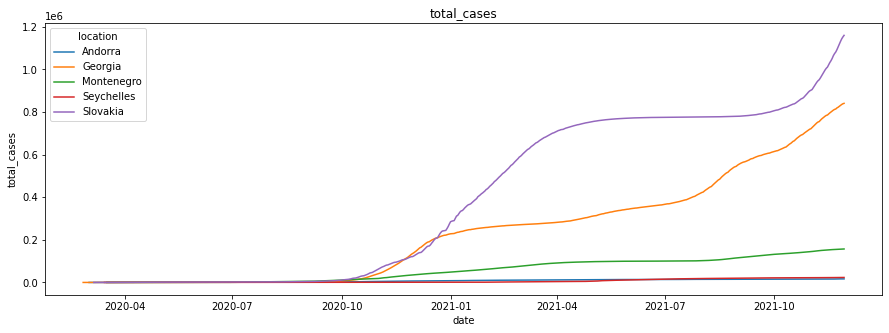

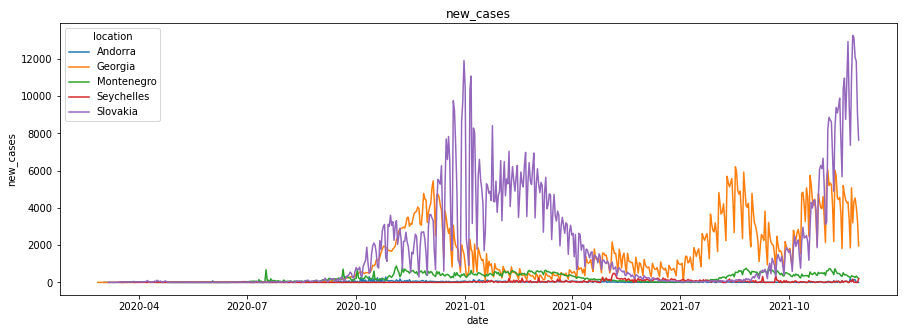

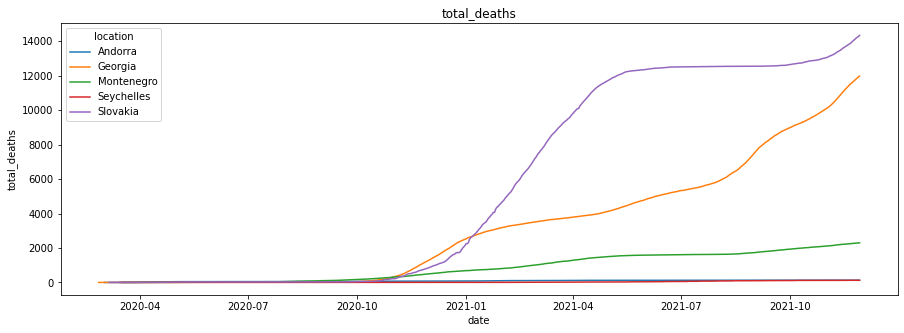

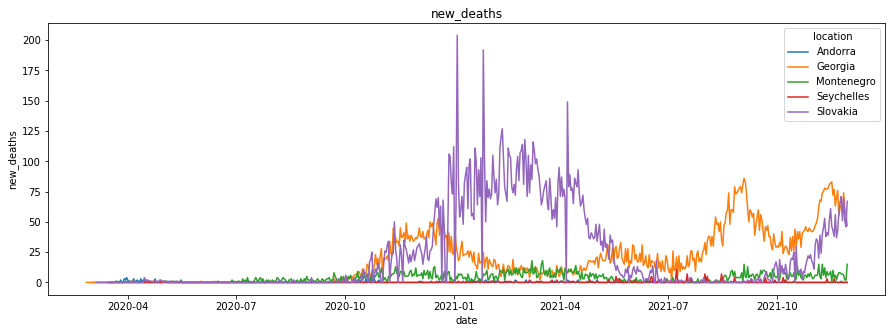

In [18]:
import seaborn as sns

locations = covid.groupby(['location']).tail(1).sort_values('ratio', ascending=False).location.head(5).values
target = covid[covid.location.isin(locations)].reset_index(drop=True)

for v in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data = target, x='date', y=v, hue='location')
    plt.show()

### 2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

위험지수 = (최근 일주일 누적확진자 / 인구수 + (일일 사망자 / 인구수) - (누적 백신 인구 / 인구수) * 보정상수) * 보정상수

코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그 다음의 일주일에 영향을 준다. 일일 사망자 수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소될 수 있다. 국가간의 비교를 위해 각 국가의 인구수로 나눠 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다.

In [19]:
def ratio_index(x):
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population'] * 0.001) * 100
    return value

covid['ratio_index'] = covid.apply(ratio_index, axis=1)
covid

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vacciantions,7days_new_case,ratio_index
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,5.0,0.0,0.0,0.0,0.000000
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0,0.000000
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0,0.000000
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0,0.000000
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136925,Zimbabwe,2021-11-25,133774.0,4704.0,2291.0,15092171.0,26173.0,8.863801e-03,27.0,1.0,1433030.0,17716.0,0.107897
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0,8.867909e-03,62.0,0.0,1435749.0,17785.0,0.108329
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0,8.867909e-03,0.0,0.0,1439901.0,19518.0,0.119785
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0,8.875529e-03,115.0,1.0,1440945.0,19348.0,0.118658


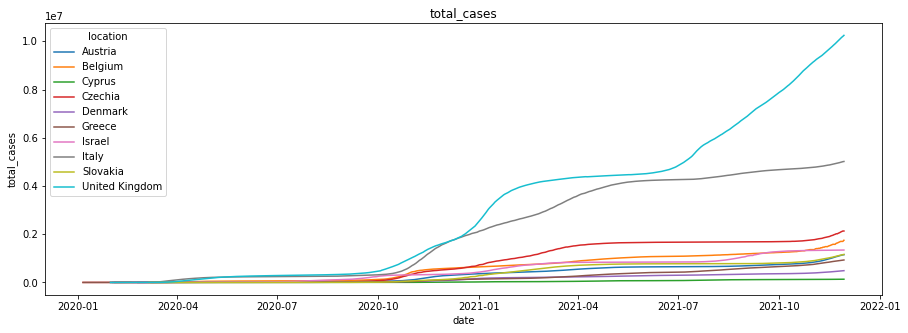

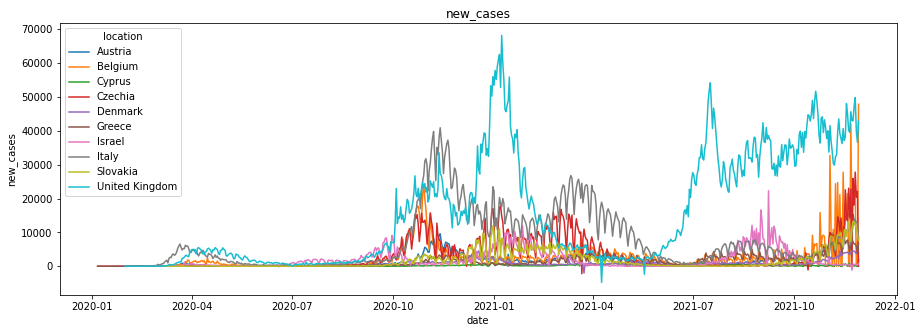

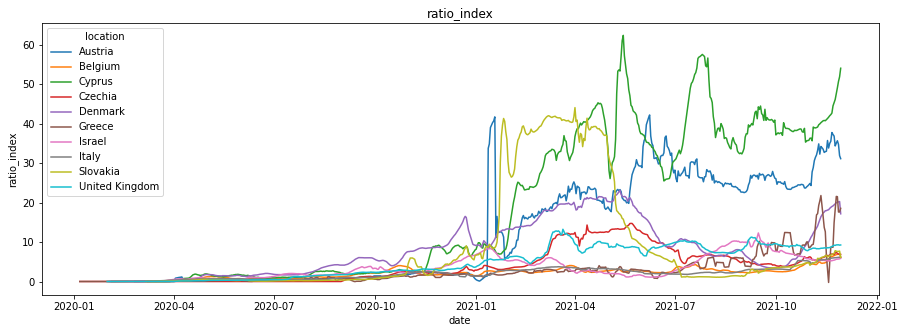

In [20]:
locations = covid.groupby(['location']).tail(1).sort_values('ratio_index', ascending=False).location.head(10).values
target = covid[covid.location.isin(locations)].reset_index(drop=True)

for v in ['total_cases', 'new_cases', 'ratio_index']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')
    plt.show()

### 2-3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 각각 한개씩 만들어라)

In [21]:
ko = covid[covid.location == 'South Korea'].reset_index(drop=True)
ko.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vacciantions,7days_new_case,ratio_index
0,South Korea,2020-01-21,0.0,0.0,0.0,51305184.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
1,South Korea,2020-01-22,1.0,0.0,5.0,51305184.0,0.0,1.949121e-08,1.0,0.0,5.0,0.0,-9.745604e-09
2,South Korea,2020-01-23,1.0,0.0,0.0,51305184.0,0.0,1.949121e-08,0.0,0.0,5.0,0.0,-9.745604e-09
3,South Korea,2020-01-24,2.0,0.0,0.0,51305184.0,0.0,3.898242e-08,1.0,0.0,5.0,0.0,-9.745604e-09
4,South Korea,2020-01-25,2.0,0.0,0.0,51305184.0,0.0,3.898242e-08,0.0,0.0,5.0,0.0,-9.745604e-09


                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  679
Model:                     AutoReg(3)   Log Likelihood               -4376.552
Method:               Conditional MLE   S.D. of innovations            156.844
Date:                Sun, 18 Sep 2022   AIC                             10.125
Time:                        15:42:43   BIC                             10.159
Sample:                             3   HQIC                            10.138
                                  679                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0652      7.966      1.264      0.206      -5.547      25.678
new_cases.L1     0.9978      0.037     27.163      0.000       0.926       1.070
new_cases.L2    -0.3117      0.052     -6.00

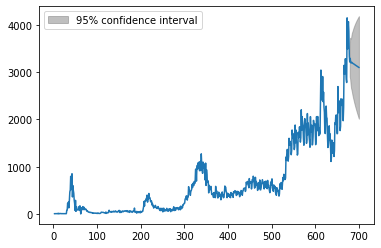

In [22]:
from statsmodels.tsa.ar_model import AutoReg

mod = AutoReg(ko.new_cases, 3, old_names = False)
res = mod.fit()
print(res.summary())
fig = res.plot_predict(1, 700)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52311D+00    |proj g|=  3.90799D-06


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.



At iterate    1    f=  6.52311D+00    |proj g|=  1.77636D-07

At iterate    2    f=  6.52311D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   0.000D+00   6.523D+00
  F =   6.5231077367761454     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  678
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4422.667
Method:                       css-mle   S.D. of innovations   

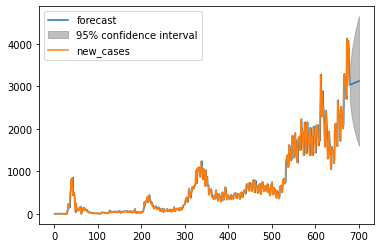

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ko.new_cases, order = (0,1,1))
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

fig = model_fit.plot_predict(1,700)

# 3번
설문조사 데이터      
데이터 출처 : 자체 제작    
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv 

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)    
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 
모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 역문항을 변환 한 후 각 그룹`(A~D)`의 영역`(Q1~Q5)`별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)

In [46]:
df3 = pd.read_csv('/kaggle/input/adp-kr-p3/problem3.csv')
df3.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


In [47]:
# 역변환

def rev(x):
    return 6-x
reverse_col = df3.filter(regex = '3$', axis = 1).columns

for col in reverse_col:
    df3[col] = df3[col].apply(lambda x : rev(x))

df3

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,5,2,4,5,3,3,...,5,1,5,2,1,3,3,4,3,4
1,1,A,2,2,3,3,4,3,5,4,...,4,3,4,3,1,3,1,2,5,1
2,2,A,1,3,2,4,2,1,2,4,...,2,2,1,3,2,1,3,3,4,5
3,3,A,3,3,2,2,2,4,2,3,...,4,3,3,4,4,4,1,1,3,2
4,4,A,3,1,4,3,4,3,2,1,...,1,1,3,2,3,1,3,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,D,1,5,4,5,5,4,5,1,...,4,2,4,5,3,3,3,5,5,5
996,996,D,4,1,3,5,4,5,2,5,...,4,4,1,3,4,1,3,1,5,4
997,997,D,2,4,2,4,1,2,4,3,...,4,2,3,1,4,1,2,4,2,1
998,998,D,4,4,4,3,2,3,2,3,...,3,2,5,3,3,5,4,4,5,4


In [48]:
df3.drop('userid', axis=1, inplace=True)

In [49]:
Q_group = set([x[:2] for x in group.columns])
Q_group

{'Q1', 'Q2', 'Q3', 'Q4', 'Q5'}

In [50]:
for q_col in Q_group:
    new_df = df3.filter(regex=q_col, axis=1)
    new_df = pd.concat([new_df, df3['group']], axis=1)
    new_df = pd.DataFrame(new_df.set_index('group').stack())
    
    print(q_col)
    print(new_df.groupby('group').agg(['mean','std','skew', pd.DataFrame.kurt]),'\n')

Q1
           0                              
        mean       std      skew      kurt
group                                     
A      3.016  1.263860 -0.077803 -1.087887
B      3.042  1.242489 -0.126751 -1.022905
C      3.030  1.243642 -0.050626 -1.033246
D      2.991  1.264325 -0.069421 -1.081406 

Q2
           0                              
        mean       std      skew      kurt
group                                     
A      3.058  1.236999 -0.129390 -0.997133
B      3.048  1.266215 -0.111043 -1.060834
C      3.063  1.256427 -0.122030 -1.046603
D      3.091  1.249913 -0.166334 -1.018150 

Q4
           0                              
        mean       std      skew      kurt
group                                     
A      3.043  1.255678 -0.090314 -1.028166
B      3.041  1.240507 -0.071541 -1.014676
C      3.014  1.283531 -0.074531 -1.100094
D      3.080  1.268546 -0.144620 -1.006126 

Q3
           0                              
        mean       std      skew    

### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

In [52]:
df3

,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,Q3-1,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,A,5,2,5,2,4,5,3,3,4,...,5,1,5,2,1,3,3,4,3,4
1,A,2,2,3,3,4,3,5,4,4,...,4,3,4,3,1,3,1,2,5,1
2,A,1,3,2,4,2,1,2,4,4,...,2,2,1,3,2,1,3,3,4,5
3,A,3,3,2,2,2,4,2,3,2,...,4,3,3,4,4,4,1,1,3,2
4,A,3,1,4,3,4,3,2,1,1,...,1,1,3,2,3,1,3,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,D,1,5,4,5,5,4,5,1,3,...,4,2,4,5,3,3,3,5,5,5
996,D,4,1,3,5,4,5,2,5,3,...,4,4,1,3,4,1,3,1,5,4
997,D,2,4,2,4,1,2,4,3,3,...,4,2,3,1,4,1,2,4,2,1
998,D,4,4,4,3,2,3,2,3,3,...,3,2,5,3,3,5,4,4,5,4


In [73]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

a = df3[df3['group'] == 'A']['Q1-1']
b = df3[df3['group'] == 'B']['Q1-1']
c = df3[df3['group'] == 'C']['Q1-1']
d = df3[df3['group'] == 'D']['Q1-1']

print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.shapiro(c))
print(stats.shapiro(d))

ShapiroResult(statistic=0.8959194421768188, pvalue=4.089666539447423e-12)
ShapiroResult(statistic=0.9031107425689697, pvalue=1.2895768654319628e-11)
ShapiroResult(statistic=0.9036667346954346, pvalue=1.4126045819184974e-11)
ShapiroResult(statistic=0.8961024284362793, pvalue=4.2081052184506085e-12)


모든 p-value값이 0.05보다 작기 때문에 정규성을 만족하지 않는다고 판단한다.
따라서 kruskal 검정을 수행한다.

- 귀무가설 : 그룹별 Q1-1값에는 유의미한 차이가 존재하지 않는다.
- 대립가설 : 그룹별 Q1-1값에는 유의미한 차이가 존재한다.

In [75]:
stats.kruskal(a,b,c,d)

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)

p-value값이 0.05보다 크기 때문에 귀무가설을 채택한다. 따라서 4개의 그룹은 통계적으로 유의미한 차이가 존재하지 않는다고 판단한다.

### 3-3 탐색적 요인분석을 수행하고 결과를 시각화 하라

요인 분석을 수행하기 전에 데이터셋의 요인성을 평가해야 한다. 

인수 분해성 또는 샘플링 적절성을 확인하는 방법에는 아래와 같이 두가지 방법이 있다. 
- Bartlett의 테스트
- Kaiser-Meyer-Olkin (KMO)검정


1. Bartlett 검정
: p-value가 0.05보다 작으면 탐색적 요인분석에 적합한 데이터라고 판단함

In [93]:
# Bartlett

#!pip install factor-analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 

ana = df3.drop(columns = 'group')
chi, p = calculate_bartlett_sphericity(ana)
p

0.12271947500271495

In [96]:
ana.shape[1]

20

2. Kaiser-Meyer-Olkin(KMO) 검정
- 관측된 각 변수와 전체 모델에 대한 적절성을 결정
- KMO는 관측된 모든 변수 간의 분산 비율을 추정
- Bartlett과 달리 p값이 없기 때문에 판단의 기준이 따로 있음
- 0.6 미만의 KMO 값은 부적절하다고 판단하며 0.8 이상이면 우수하다고 할 수 있음
- KMO test를 하기 위해서는 변수가 최소 3개 이상

In [86]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(ana)
kmo_model

0.4906789809649262

kmo 값이 0.6보다 작기 때문에 부적절하다고 판단함

3. 요인 수 선택

In [88]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = len(ana.columns), rotation = None)
fa.fit(ana)

# Eigen값 체크
ev, v = fa.get_eigenvalues()
ev

array([1.29472621, 1.19444363, 1.17361917, 1.16681531, 1.1131885 ,
       1.10025822, 1.07973875, 1.0452492 , 1.03747052, 1.01002279,
       0.98649583, 0.97013931, 0.95120844, 0.92404198, 0.90642169,
       0.86125596, 0.83762075, 0.8149101 , 0.78237407, 0.74999957])

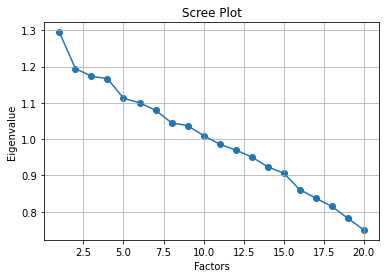

In [90]:
plt.scatter(range(1, ana.shape[1]+1), ev)
plt.plot(range(1, ana.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

- Eigen값이 1이상이거나 그래프 기울기가 완만해지기 전까지 나누어야 데이터 결함을 최소화할 수 있다. 
- 10개로 설정함

4. 탐색적 요인분석 실시

In [91]:
fa = FactorAnalyzer(n_factors = 10, rotation = 'varimax')
fa.fit(ana)

efa_result = pd.DataFrame(fa.loadings_, index = ana.columns)
efa_result

,0,1,2,3,4,5,6,7,8,9
Q1-1,-0.029722,0.011468,0.034966,0.018842,-0.020893,0.016895,-0.053347,-0.026672,-0.184307,-0.075399
Q1-2,0.010295,0.008261,-0.010310,-0.009657,-0.020421,-0.023071,0.116016,0.021088,-0.001335,0.178130
Q1-3,-0.050123,0.002114,0.010682,-0.002431,0.031135,0.007873,0.038681,0.161519,0.030794,-0.004498
Q1-4,0.058694,-0.010812,0.043024,-0.023060,0.002764,-0.036239,-0.004692,-0.059438,0.033404,-0.007434
Q2-1,0.002090,0.026173,0.036455,-0.001112,-0.001598,-0.080383,0.132595,-0.016223,0.004722,0.000374
Q2-2,0.061139,-0.001929,0.007170,0.049092,0.084769,0.014668,-0.138968,0.109289,0.037734,0.116125
Q2-3,-0.023326,-0.059019,0.033715,0.014025,-0.029200,-0.120589,-0.164787,0.114162,-0.101125,0.192486
Q2-4,0.011802,-0.107066,0.004789,-0.023512,-0.033777,0.074171,-0.080023,0.224238,0.148540,-0.056131
Q3-1,0.996426,-0.011976,-0.003424,-0.004712,-0.025752,-0.016037,0.008380,-0.019172,-0.025492,-0.009047
Q3-2,-0.009294,0.992289,-0.026745,0.021515,0.010304,0.068619,-0.013261,-0.004582,-0.026657,0.058438


<AxesSubplot:>

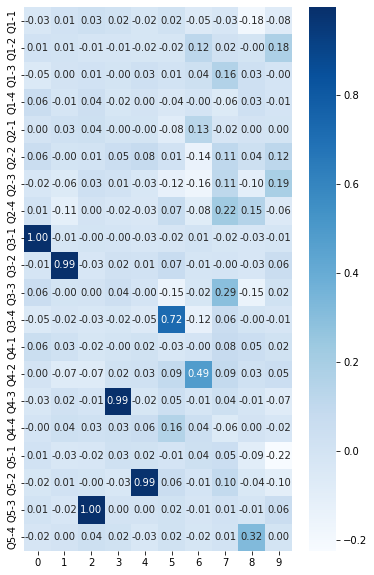

In [92]:
plt.figure(figsize = (6,10))
sns.heatmap(efa_result, cmap = 'Blues', annot=True, fmt='.2f')